In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [2]:
path = r"C:\Users\ahamr\Desktop\Machine Learning/Data Sets"

In [3]:
df = pd.read_csv(os.path.join(path, 'data_cleaned.csv'))

In [4]:
df_pleasant = pd.read_csv(os.path.join(path, 'Dataset-pleasant_weather.csv'))

In [5]:
df

,Unnamed: 0,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,...,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,...,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,...,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,8,1.0320,0.69
3,3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,...,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,6,1.0443,0.98
4,4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,...,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,7,1.0430,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,4,1.0263,0.98
22946,22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,1.00
22947,22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.85
22948,22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.94


In [6]:
df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
df

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,...,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,...,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,...,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,8,1.0320,0.69
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,8,...,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,6,1.0443,0.98
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,7,1.0430,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,2,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,4,1.0263,0.98
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,0,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,1.00
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,2,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.85
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,1,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.94


In [8]:
df_pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
pleasant_weather= df_pleasant[['BASEL_pleasant_weather','BELGRADE_pleasant_weather','BUDAPEST_pleasant_weather','DEBILT_pleasant_weather','DUSSELDORF_pleasant_weather','HEATHROW_pleasant_weather','KASSEL_pleasant_weather','LJUBLJANA_pleasant_weather','MAASTRICHT_pleasant_weather','MADRID_pleasant_weather','MUNCHENB_pleasant_weather','OSLO_pleasant_weather','SONNBLICK_pleasant_weather','STOCKHOLM_pleasant_weather','VALENTIA_pleasant_weather'
  ]]

In [10]:
#Create an 'X' matrix 
X = df
y = pleasant_weather

In [11]:
print(X.shape)
print(y.shape)

(22950, 135)
(22950, 15)


In [15]:
from sklearn.model_selection import train_test_split
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 135) (18360, 15)
(4590, 135) (4590, 15)


#### GRID SEARCH

In [17]:
# creating a RF classifier
clf = RandomForestClassifier()

In [18]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [19]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ahamr\anaconda3\Lib\site-packa

Search took 72.74275579849879 minutes


In [20]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.630718954248366


#### RANDOM SEARCH

In [21]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [22]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [23]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 85.35626890261968 minutes


In [24]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 70, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 210}
Best RANDOM search score is: 0.6108932461873638


In [25]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.630718954248366
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 70, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 210}
Best RANDOM search score is: 0.6108932461873638


In [62]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=7, min_samples_split=3,
                       n_estimators=200)

In [63]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6527233115468409


In [64]:
pleasant_weather ={0: 'BASEL_pleasant_weather', 1: 'BELGRADE_pleasant_weather', 2: 'BUDAPEST_pleasant_weather', 3: 'DEBILT_pleasant_weather', 4: 'DUSSELDORF_pleasant_weather', 5: 'HEATHROW_pleasant_weather', 6: 'KASSEL_pleasant_weather', 7: 'LJUBLJANA_pleasant_weather', 8: 'MAASTRICHT_pleasant_weather', 9: 'MADRID_pleasant_weather', 10: 'MUNCHENB_pleasant_weather', 11: 'OSLO_pleasant_weather', 12: 'SONNBLICK_pleasant_weather', 13: 'STOCKHOLM_pleasant_weather', 14: 'VALENTIA_pleasant_weather'}

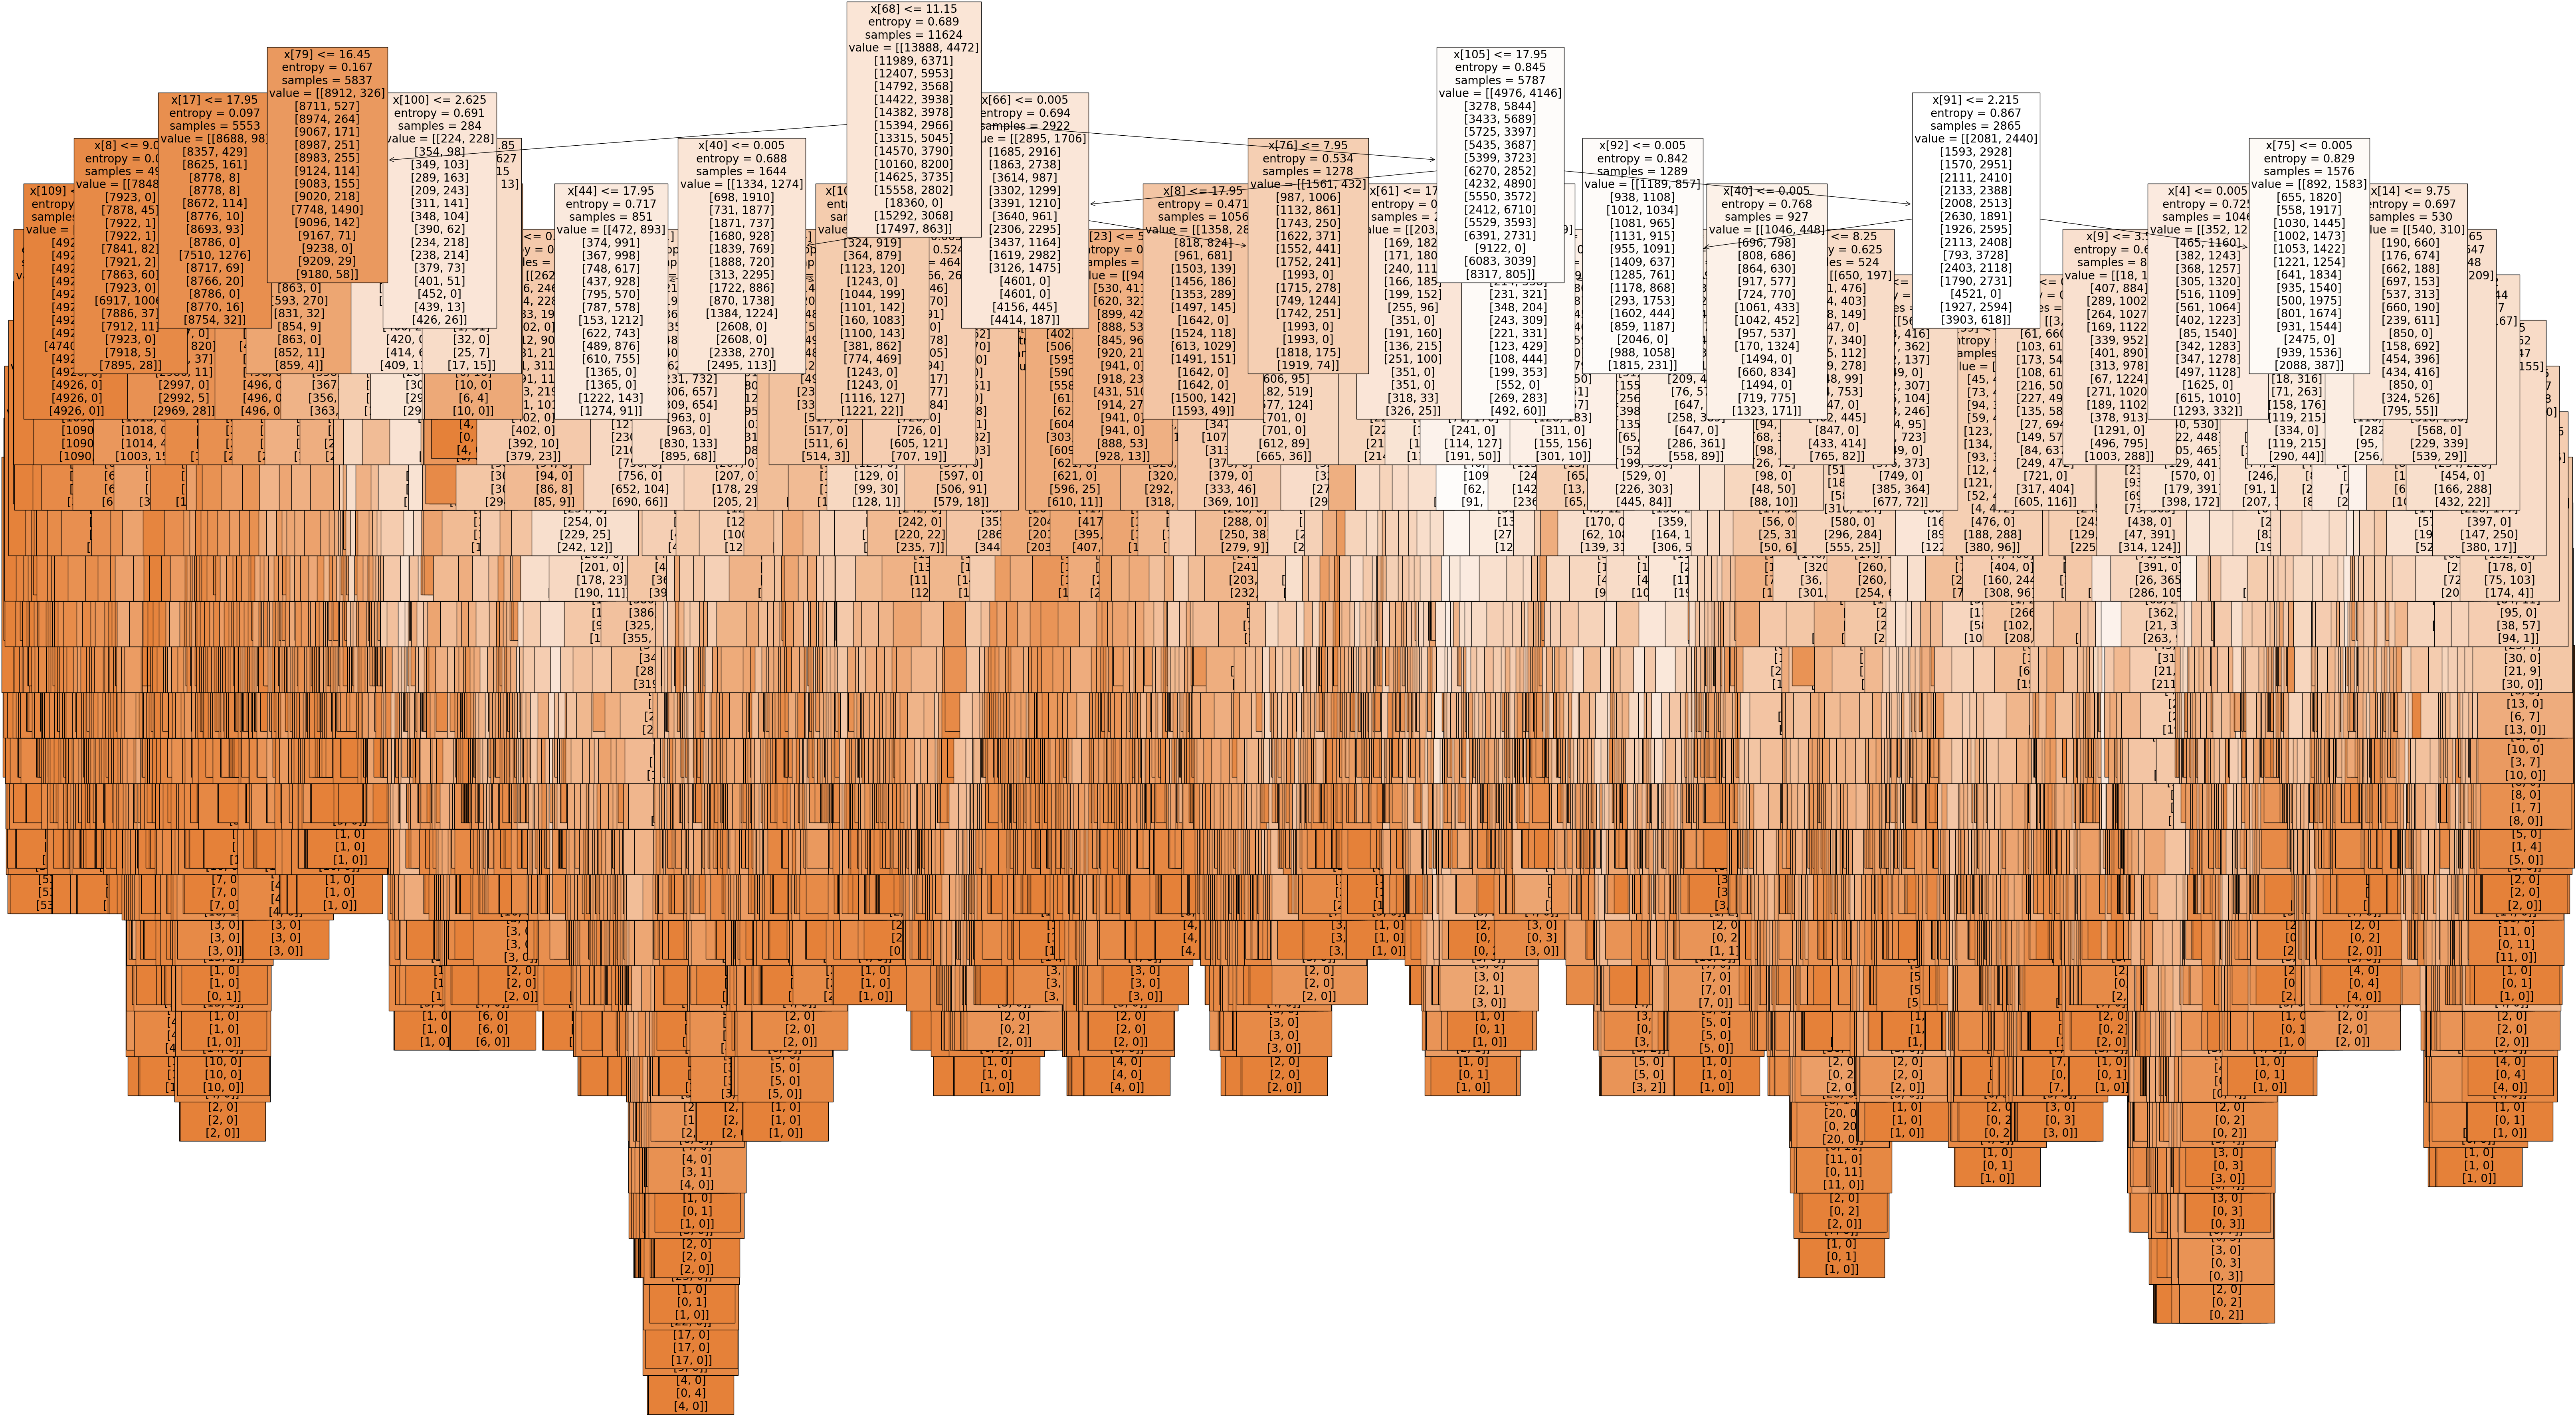

In [41]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[5], fontsize = 20, filled=True);

In [42]:
fig.savefig(f"{path}/decision_tree_new.png")

In [65]:
#np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.00265523, 0.00284863, 0.0019556 , 0.00616215, 0.01434294,
       0.00716726, 0.01905024, 0.00812739, 0.02385576, 0.00333172,
       0.00332827, 0.00325318, 0.00376792, 0.015096  , 0.00397195,
       0.00955257, 0.00889716, 0.01371366, 0.00150696, 0.00180435,
       0.00180547, 0.00399723, 0.01460187, 0.00373622, 0.01143923,
       0.00613976, 0.01304171, 0.00265243, 0.00255896, 0.00467885,
       0.00503113, 0.01474158, 0.00446244, 0.02154347, 0.00433357,
       0.02500798, 0.00410232, 0.00270226, 0.00283148, 0.00508249,
       0.01539835, 0.00640532, 0.01780303, 0.00348081, 0.03701343,
       0.00183233, 0.00308963, 0.00388317, 0.0042571 , 0.00955785,
       0.00383351, 0.01109362, 0.00351536, 0.01544292, 0.00271539,
       0.00342394, 0.00333937, 0.01156104, 0.00389918, 0.00990221,
       0.00433239, 0.01282143, 0.00311271, 0.00325178, 0.0030921 ,
       0.00632874, 0.01616762, 0.00571351, 0.01388894, 0.00415018,
       0.01506746, 0.00512503, 0.00366505, 0.00365043, 0.00743

In [66]:
np.set_printoptions(threshold=1000)

In [67]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00265523, 0.00284863, 0.0019556 , 0.00616215, 0.01434294,
         0.00716726, 0.01905024, 0.00812739, 0.02385576],
        [0.00333172, 0.00332827, 0.00325318, 0.00376792, 0.015096  ,
         0.00397195, 0.00955257, 0.00889716, 0.01371366],
        [0.00150696, 0.00180435, 0.00180547, 0.00399723, 0.01460187,
         0.00373622, 0.01143923, 0.00613976, 0.01304171],
        [0.00265243, 0.00255896, 0.00467885, 0.00503113, 0.01474158,
         0.00446244, 0.02154347, 0.00433357, 0.02500798],
        [0.00410232, 0.00270226, 0.00283148, 0.00508249, 0.01539835,
         0.00640532, 0.01780303, 0.00348081, 0.03701343],
        [0.00183233, 0.00308963, 0.00388317, 0.0042571 , 0.00955785,
         0.00383351, 0.01109362, 0.00351536, 0.01544292],
        [0.00271539, 0.00342394, 0.00333937, 0.01156104, 0.00389918,
         0.00990221, 0.00433239, 0.01282143, 0.00311271],
        [0.00325178, 0.0030921 , 0.00632874, 0.01616762, 0.00571351,
         0.01388894, 0.00415018, 0.0150674

In [68]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.04650464, 0.05116167, 0.07290028, 0.10467997, 0.15609932,
       0.13153178, 0.16351827, 0.11780267, 0.15580139])

In [72]:
important = pd.Series(clf3.feature_importances_, index=X.columns)
important

BASEL_cloud_cover         0.002655
BASEL_humidity            0.002849
BASEL_pressure            0.001956
BASEL_global_radiation    0.006162
BASEL_precipitation       0.014343
                            ...   
VALENTIA_temp_min         0.002118
VALENTIA_temp_max         0.006003
KASSEL_cloud_cover        0.002757
MUNCHENB_pressure         0.003344
STOCKHOLM_humidity        0.002767
Length: 135, dtype: float64

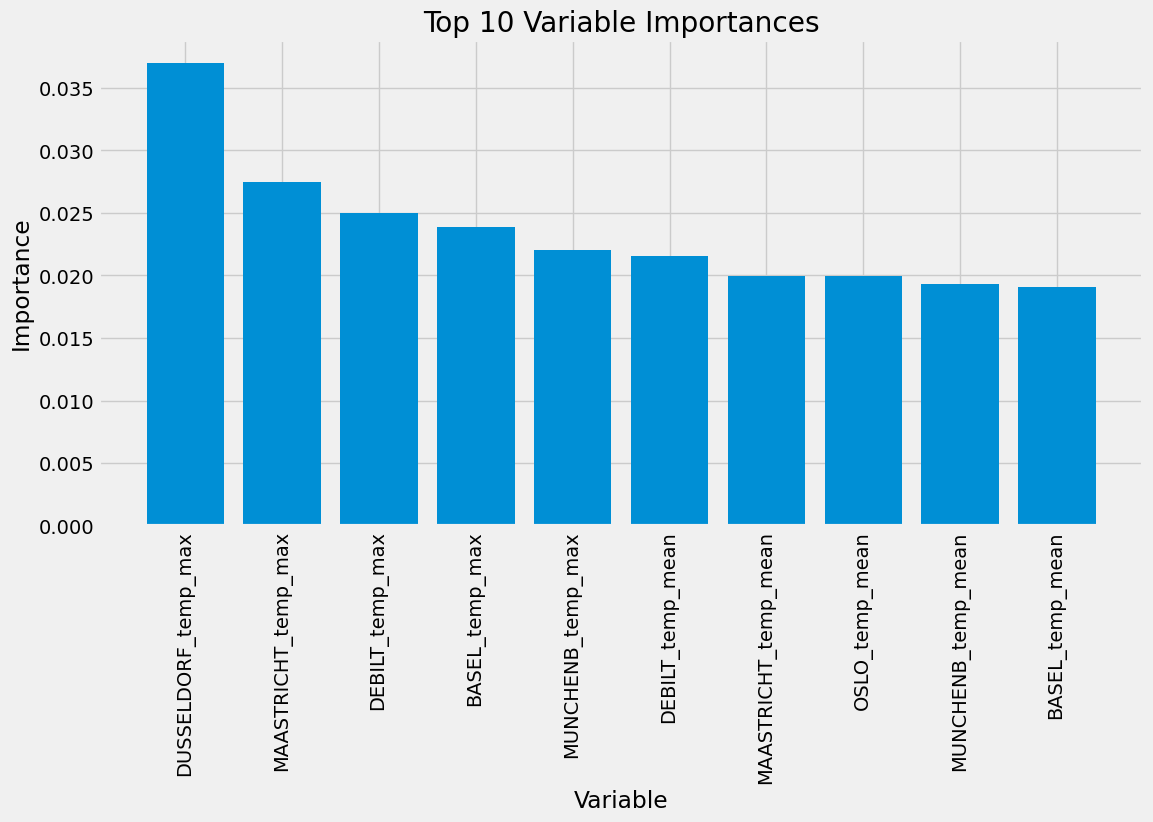

In [73]:
important_sorted = important.sort_values(ascending=False)[:10]

# Plotting
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))

# The indices (X.columns) of the sorted series are the variable names
# The values are the importances
x_values = range(len(important_sorted))
plt.bar(x_values, important_sorted, orientation='vertical')
plt.xticks(x_values, important_sorted.index, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top 10 Variable Importances')

plt.show()